In [1]:
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nohindi_noduplicate_df = pd.read_pickle("data/nohindi_noduplicate_recipes.pkl")
nohindi_noduplicate_df

,name,description,cuisine,course,diet,prep_time,ingredients,instructions
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,30.0,"4 cups Indian borage (Doddapatre) , cleaned an...","To begin making the Doddapatre Tambuli, first ..."
1,Fish Tandoori Recipe,Have you ever tried out fish tandoori? Trust m...,North Indian,Appetizer,High Protein Non Vegetarian,80.0,"1 Fish , nicely washed with bones on (I used P...","To begin making the Fish Tandoori recipe, keep..."
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian,Main Course,No Onion No Garlic (Sattvic),55.0,300 grams Colocasia root (Arbi) 1 Green Bell ...,To begin making the Arbi Shimla Mirch Sabzi Re...
3,Ambur Style Brinjal Curry Recipe,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,20.0,5 Brinjal (Baingan / Eggplant) 1 Onion 2 Tom...,To begin making the Ambur Style Brinjal Curry ...
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,35.0,"1 cup Mango (Raw) , diced 2 tablespoons Jagge...",To begin making Mangalorean Mavinakayi Menasin...
...,...,...,...,...,...,...,...,...
6466,Alu Vadi Or Patrode Recipe - Maharashtrian Sna...,Alu vadi or Patrode is a typical Maharashtrian...,Maharashtrian,Snack,Vegetarian,40.0,"Colocasia Leaves (Arbi), Multigrain flour, Tam...",To begin making Alu Vadi or Patrode Recipe - M...
6467,Kheel Paniyaram Recipe (Puffed Rice Paniyaram),Paniyaram is a south Indian healthy breakfast ...,South Indian,Snack,Vegetarian,105.0,"Puffed rice, Sooji (Semolina/ Rava), Salt, Cur...","To begin making the Kheel Paniyaram recipe, dr..."
6468,Palak Puri Recipe (Crispy Spinach Puri Snack),"Puri is deep fried Indian bread, commonly avai...",North Indian,Snack,Vegetarian,30.0,"Whole Wheat Flour, Spinach Leaves (Palak), Gin...","Wash the finely chopped spinach, and let it dr..."
6469,Spinach Oats Vada Recipe,Spinach Oats Vada Recipe is a healthy twist to...,South Indian,Snack,Vegetarian,50.0,"Spinach Leaves (Palak), Chana dal (Bengal Gram...","To prepare Spinach Oats Vada Recipe, in a larg..."


In [3]:
#change the oreder of columns
column_order = ['name', 'ingredients', 'description', 'instructions', 'cuisine', 'course', 'diet', 'prep_time']
recom_df = nohindi_noduplicate_df[column_order ]

In [4]:
recom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          6471 non-null   object 
 1   ingredients   6471 non-null   object 
 2   description   6471 non-null   object 
 3   instructions  6471 non-null   object 
 4   cuisine       6463 non-null   object 
 5   course        6437 non-null   object 
 6   diet          6437 non-null   object 
 7   prep_time     6462 non-null   float64
dtypes: float64(1), object(7)
memory usage: 404.6+ KB


In [5]:
recom_df.describe(include="all")

,name,ingredients,description,instructions,cuisine,course,diet,prep_time
count,6471,6471,6471,6471,6463,6437,6437,6462.000000
unique,6437,6465,6426,6471,76,13,10,NaN
top,Green Tea Coconut Ladoo Recipe - Coconut Energ...,,,"To begin making the Doddapatre Tambuli, first ...",Continental,Lunch,Vegetarian,NaN
freq,2,6,3,1,1079,1444,4472,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.014547
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.598775
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000


In [6]:
recom_df["name"].value_counts()

name
Green Tea Coconut Ladoo Recipe - Coconut Energy Balls                                        2
Vegetable Uttapam Recipe                                                                     2
Chaat Masala Recipe                                                                          2
Maharashtrian Achar Ka Masala (Pickle Mix Recipe)                                            2
Punjabi Garam Masala Powder Recipe                                                           2
                                                                                            ..
Karela Thepla Recipe - Bitter Gourd Indian Flat Bread                                        1
Andhra Style Mukkala Pulusu Recipe-Mixed Vegetable Sambar                                    1
Stuffed Karela With Aloo Recipe                                                              1
Tamil Nadu Style Karamani Murungakkai Kuzhambu Recipe-Black eyed Beans & Drumstick Curry     1
Kerala Style Vettu Cake Recipe (Eggless Whole

In [7]:
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \ufeff', 'Gujarati')
recom_df["cuisine"] = recom_df['cuisine'].str.replace('Gujarati \\ufeff', 'Gujarati')

recom_df["cuisine"].unique()

array(['Indian', 'North Indian', 'Mangalorean', 'Kerala', 'Konkan',
       'South Indian', 'Tamil Nadu', 'Bengali', 'Andhra', 'Coorg',
       'Hyderabadi', 'Kashmiri', 'Punjabi', 'Gujarati',
       'Coastal Karnataka', 'Karnataka', 'Goan', 'Sichuan', 'Udupi',
       'Chettinad', 'Maharashtrian', 'Mughlai', 'Malvani',
       'North East India', 'Rajasthani', 'Parsi', 'Bihari', 'Awadhi',
       'North Karnataka', 'Assamese', 'Pakistani', 'Himachal',
       'Middle Eastern', 'Oriya', 'Uttarakhand-North Kumaon', 'Lucknowi',
       'Sindhi', 'Indo Chinese', 'Uttar Pradesh', 'Kongunadu', 'Chinese',
       'Haryana', 'South Karnataka', 'Fusion', nan, 'Malabar', 'Nepalese',
       'Continental', 'Jharkhand', 'Sri Lankan', 'Thai', 'Arab',
       'Nagaland', 'Afghan', 'Asian', 'African', 'Korean', 'European',
       'Mexican', 'Japanese', 'Italian', 'Mediterranean', '', 'Jewish',
       'Vietnamese', 'French', 'Cantonese', 'Caribbean', 'Indonesian',
       'American', 'Malaysian', 'Greek', 'Burm

In [8]:
recom_df["cuisine"].value_counts()

cuisine
Continental     1079
Indian          1021
North Indian     800
South Indian     596
Italian          253
                ... 
Jharkhand          2
Bangladeshi        1
Jewish             1
Hunan              1
Singapore          1
Name: count, Length: 76, dtype: int64

In [9]:
recom_df["course"].value_counts()

course
Lunch                     1444
Snack                      895
Side Dish                  880
Dinner                     723
Dessert                    687
Appetizer                  673
Main Course                331
World Breakfast            286
South Indian Breakfast     269
North Indian Breakfast     120
Indian Breakfast            94
One Pot Dish                28
Brunch                       7
Name: count, dtype: int64

In [10]:
recom_df["diet"].value_counts()

diet
Vegetarian                      4472
High Protein Vegetarian          587
Non Vegeterian                   414
Eggetarian                       318
Diabetic Friendly                244
High Protein Non Vegetarian      214
Gluten Free                       61
No Onion No Garlic (Sattvic)      59
Vegan                             53
Sugar Free Diet                   15
Name: count, dtype: int64

Categorize the "prep_time" column and conduct EDA on it

In [11]:
recom_df["prep_time"].value_counts()

prep_time
40.0      918
30.0      775
50.0      607
35.0      522
45.0      501
         ... 
47.0        1
365.0       1
2900.0      1
68.0        1
53.0        1
Name: count, Length: 167, dtype: int64

In [12]:
def categorize_preparation_time(time):
    if time <= 15:
        return '~15 min'
    elif time <= 30:
        return '~30 min'
    elif time <= 45:
        return '~45 min'
    elif time <= 60:
        return '~1 hour'
    elif time <= 75:
        return '~1 hour 15 min'
    elif time <= 90:
        return '~1 hour 30 min'
    elif time <= 105:
        return '~1 hour 45 min'
    elif time <= 120:
        return '~2 hours'
    else:
        # For times beyond 120 minutes, categorize in 30-minute intervals, in hours
        hours = time // 60
        if time % 60 <= 15:
            return f'~{hours} hours'
        elif time % 60 <= 45:
            return f'~{hours} hours 30 min'
        else:
            return f'~{hours + 1} hours'

recom_df['categorized_prep_time'] = recom_df['prep_time'].apply(categorize_preparation_time)
recom_df['categorized_prep_time']

0              ~30 min
1       ~1 hour 30 min
2              ~1 hour
3              ~30 min
4              ~45 min
             ...      
6466           ~45 min
6467    ~1 hour 45 min
6468           ~30 min
6469           ~1 hour
6470    ~1 hour 15 min
Name: categorized_prep_time, Length: 6471, dtype: object

In [13]:
recom_df['categorized_prep_time'].value_counts().sort_values(ascending=False)

categorized_prep_time
~45 min               1949
~30 min               1546
~1 hour               1393
~1 hour 15 min         459
~15 min                391
~1 hour 30 min         195
~1 hour 45 min          95
~2.0 hours 30 min       85
~3.0 hours              48
~2 hours                46
~2.0 hours              31
~3.0 hours 30 min       28
~8.0 hours 30 min       21
~4.0 hours 30 min       20
~9.0 hours              20
~6.0 hours 30 min       19
~7.0 hours              16
~4.0 hours              15
~5.0 hours 30 min       13
~5.0 hours              12
~6.0 hours              11
~nan hours               9
~7.0 hours 30 min        9
~8.0 hours               9
~9.0 hours 30 min        8
~10.0 hours 30 min       6
~48.0 hours 30 min       2
~14.0 hours              2
~10.0 hours              2
~12.0 hours 30 min       2
~12.0 hours              2
~16.0 hours              1
~47.0 hours              1
~24.0 hours              1
~15.0 hours 30 min       1
~13.0 hours 30 min       1
~13.0 

In [14]:
len(recom_df['categorized_prep_time'].unique())

38

Plot the distribution of four "course", "diet", "cuisine" and "categorized_prep_time" columns

In [15]:
def plot_top_categories(df, column, top_n=20):
   
    # Count the occurrences and sort in descending order
    sorted_counts = df[column].value_counts().sort_values(ascending=False)
    
    # Limit to top N categories if there are more than top_n
    categories_to_plot = sorted_counts[:top_n]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=categories_to_plot.values, y=categories_to_plot.index, color = "skyblue")
    
    plt.title(f'{column.capitalize()} Distribution')
    plt.ylabel(column.capitalize())
    plt.xlabel('Frequency')
    plt.xticks(rotation=45)
    plt.rc('font', family='Arial', size=12)

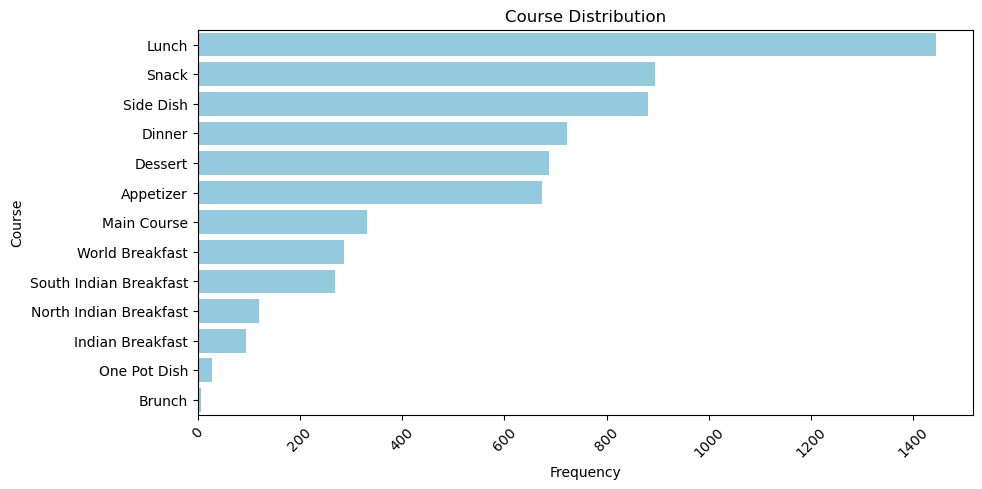

In [16]:
plot_top_categories(recom_df, 'course')

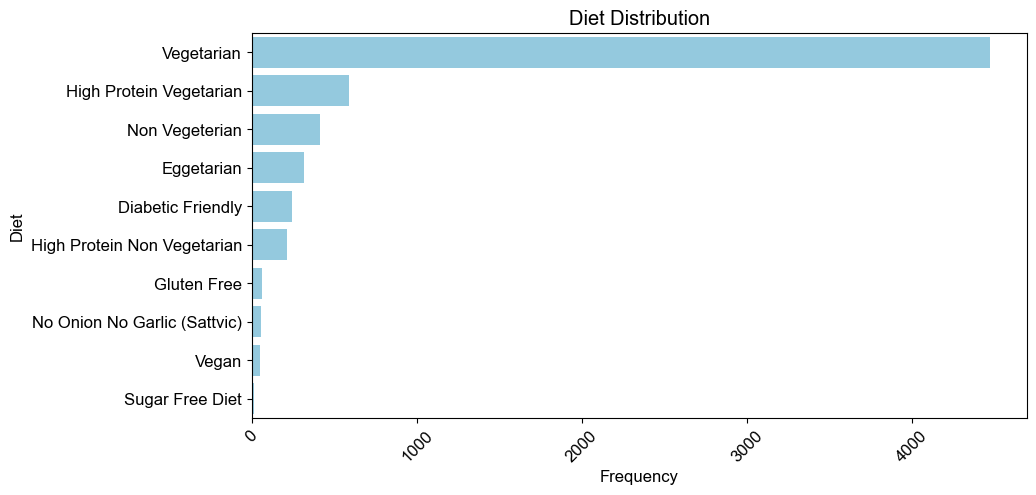

In [17]:
plot_top_categories(recom_df, 'diet')

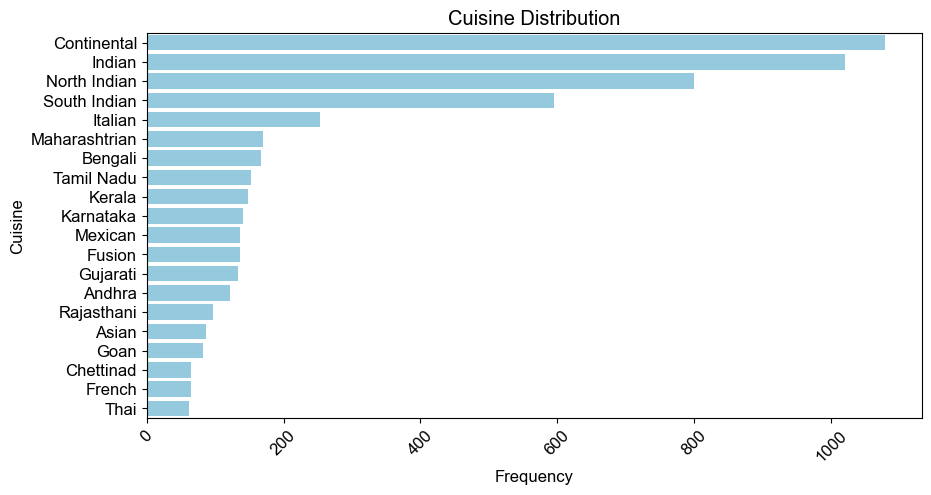

In [18]:
plot_top_categories(recom_df, 'cuisine')

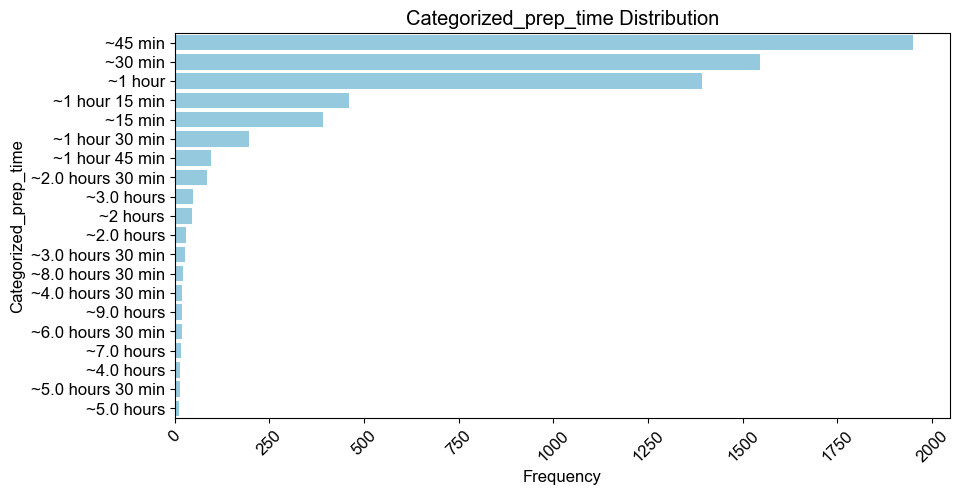

In [19]:
plot_top_categories(recom_df, 'categorized_prep_time')

Clean the "ingredients" column 

In [20]:
unwanted_words = ['cleaned','and','washed','as','needed','thinly','sliced','Thin','add','adjustable','adjust','just','unripe', 'unskimmed', 
                  'more', 'more if','rings', 'I', 'have','used', 'I like adding','mashed','you', 'can',"minced",'preferably','per','about',
                  'warm','very', 'vertically','well','long','tsp','tbsp', 'uncooked','unpeeled','your','th','the','of','powdered',
                  'could', 'also', 'use','give', 'it','is', 'prefered','if','bunch','a','small', 'piece','pieces', 'pinch',"medium sized",
                  'additional','assorted','approximately','optional','broken','bowl','finely','chopped','small','cut','roasted',
                  'thick','cubes','julienned','deseeded', "de-veined",'slices', "only", "need",'taste', 'required','boiled',"big", "large",
                  'coarsely','pounded','grated','blanched','a','few','pureed','made','cubed','steamed','quartered','into','preferable',
                  'peeled','slivered','or','whisked','nicely','on','diced',' but recommended','according','overnight',"peel",
                  'soaked','in','roughly','Wet','Ingredients','Everest brand', 'Enough','any','other','s ', 'teaspoon', "one","two",
                  'tablespoons','tablespoon', "eggless", " gluten free", "no onion", "no garlic", "no egg", "no eggs"]

# Download stopwords list
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))
#stop_words.update(unwanted_words)

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

# Function to clean and retain only nouns (ingredients)
def clean_ingredients(ingredient_text):
    cleaned_text = re.sub(r'^"|"', '', ingredient_text.strip())
    icleaned_text =  re.sub(r'Archanas\s*Kitchen|Archana\\\\s Kitchen', '',cleaned_text)
    cleaned_text = re.sub(r'Archana\\s Kitchen', '',cleaned_text)
    cleaned_text = re.sub(r'\d+(?:-\d+)?(?:/\d+)?\s*(?:cup|cups?|tablespoon|tablespoons?|teaspoon|teaspoons?|gms?|gram|grams?|kg|ml|inch|pound|pounds?|liters?)?\s*', ',', 
                          cleaned_text, flags=re.IGNORECASE)# Remove quantities and units
    cleaned_text = re.sub(r'\d+\s+\b\w+\b', ',', cleaned_text, flags=re.IGNORECASE)##find a number followed by unit
    cleaned_text = re.sub(r'\b(to|for|with|without|salt)\b', r', \1', cleaned_text, flags=re.IGNORECASE) # Add a comma before the words "to" or "for" (case-insensitive)
    
    for word in unwanted_words:
        cleaned_text = re.sub(r'\b' + re.escape(word) + r'\b', '', cleaned_text, flags=re.IGNORECASE)

     # Split the cleaned text into individual ingredients 
    ingredient_list = [ingredient.strip().lower() for ingredient in cleaned_text.split(',') if ingredient.strip() 
                       and not ingredient.strip().lower().startswith('for') 
                       and not ingredient.strip().lower().startswith('to') 
                       and not ingredient.strip().lower().startswith('with')
                      and not ingredient.strip().lower().startswith('without')
                      and not ingredient.strip().lower().startswith('no')]
    
    processed_ingredients = []
    for ingredient in ingredient_list:
        # Create a spaCy document object for each ingredient
        doc = nlp(ingredient)
        # Keep only noun phrases or single nouns as ingredients
        lemmatized_words = [token.lemma_.lower() for token in doc if token.pos_ not in {"VERB", "ADV"} and token.is_alpha and token.text.lower() not in stop_words]
        if lemmatized_words:  # if it is not empty
            processed_ingredients.append(" ".join(lemmatized_words))  # Join multi-word ingredients like 'cumin powder' 
    return  processed_ingredients

recom_df['cleaned_ingredients'] = recom_df['ingredients'].apply(clean_ingredients)
recom_df['cleaned_ingredients']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rogha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [indian borage doddapatre, curd dahi yogurt, c...
1       [fish, curd dahi yogurt, onion, green chilli, ...
2       [colocasia root arbi, green bell pepper capsic...
3       [brinjal baingan eggplant, onion, ginger garli...
4       [mango raw, jaggery, turmeric powder haldi, ta...
                              ...                        
6466    [colocasia leave arbi, multigrain flour, tamar...
6467    [rice, sooji rava, salt, curd dahi yogurt, gre...
6468    [whole wheat flour, spinach leave palak, ginge...
6469    [spinach leave palak, chana dal bengal gram da...
6470    [whole wheat flour, sugar, soda, butter, salt,...
Name: cleaned_ingredients, Length: 6471, dtype: object

In [21]:
recom_df["cleaned_ingredients"].value_counts()

cleaned_ingredients
[]                                                                                                                                                                                                                                                       6
[byadagi chilli, dry red chilli, coriander dhania seed, whole black peppercorn, cumin seeds jeera, turmeric powder haldi]                                                                                                                                2
[coriander dhania seed, arhar dal split toor dal, chana dal bengal gram dal, methi seed fenugreek seed, white urad dal whole, mustard seed kadugu, red chilli powder, turmeric powder haldi, whole black peppercorn, cumin seeds jeera]                  2
[sooji rava, ghee, sugar, milk, water, cardamom powder elaichi, saffron strand, strand, ghee, nut, sultana raisin]                                                                                                                 

Create a unique ingredient list and count the unique ingredient items

In [22]:
# Create a unique ingredient set by flattening the list and removing duplicates
unique_ingredient_list = set(ingredient for sublist in recom_df["cleaned_ingredients"] for ingredient in sublist if ingredient)

#Convert the set to a list
unique_ingredient_list = sorted(unique_ingredient_list)
unique_ingredient_list

['aa oil',
 'aachi fish masala',
 'aam papad sun mango',
 'aamra',
 'aar maach fish',
 'achari masala',
 'achari masala oil',
 'achari mayo',
 'active dry yeast',
 'ada',
 'adjus',
 'adobo sauce',
 'agar agar',
 'agathi keerai',
 'ajwain carom seed',
 'ajwain carom seeds black sesame seed',
 'ajwain carom seeds curry leave',
 'ajwain carom seeds water',
 'ajwain powder',
 'akhrot',
 'al dente',
 'alfalfa powder',
 'alfalfa sprout',
 'alma nellikai',
 'almond',
 'almond almond butter',
 'almond badam',
 'almond butter',
 'almond cashew',
 'almond cashewnut',
 'almond essence badam essence',
 'almond meal badam powder',
 'almond milk',
 'almond milk badam milk',
 'almond nuts pistachio',
 'almond oil badam oil',
 'almond paste',
 'aloe vera extract',
 'along',
 'aloo bhujia',
 'aloo tikki potato',
 'alu',
 'amaranth',
 'amaranth seeds rajgira',
 'ambade',
 'amchur dry mango powder',
 'amchur dry mango powder coriander dhania',
 'amchur dry mango powder mint leave pudina',
 'amchur dry ma

In [23]:
len(unique_ingredient_list)

2625

Find the most frequent ingredients and plot their distribution 

In [24]:
#Flatten the list of ingredients from all rows
all_ingredients = [ingredient for sublist in recom_df['cleaned_ingredients'] for ingredient in sublist]

#Count the frequency of each ingredient
ingredient_counts = Counter (all_ingredients)

most_frequent_ingredients = ingredient_counts.most_common(10) 

print(f"Most frequent ingredients: {most_frequent_ingredients[0][0]}, Count: {most_frequent_ingredients[0][1]}")

sorted_clean_ingredients = ingredient_counts.most_common()  
print(sorted_clean_ingredients)

Most frequent ingredients: salt, Count: 5583
[('salt', 5583), ('onion', 2477), ('oil', 2306), ('garlic', 2165), ('turmeric powder haldi', 2151), ('green chilli', 2141), ('red chilli powder', 1741), ('ginger', 1638), ('cumin seeds jeera', 1501), ('mustard seed kadugu', 1230), ('sugar', 1178), ('water', 1155), ('coriander dhania', 1109), ('milk', 1055), ('dry red chilli', 968), ('ghee', 954), ('extra virgin olive oil', 904), ('asafoetida hing', 834), ('garam masala powder', 813), ('lemon juice', 808), ('black pepper powder', 806), ('coriander powder dhania', 802), ('fresh coconut', 777), ('cumin powder jeera', 762), ('sprig curry', 734), ('curd dahi yogurt', 672), ('carrot gajjar', 645), ('butter', 636), ('potato aloo', 597), ('cinnamon stick dalchini', 594), ('whole black peppercorn', 543), ('purpose flour maida', 537), ('whole wheat flour', 530), ('clove laung', 515), ('cardamom elaichi pod seed', 493), ('jaggery', 492), ('whole egg', 491), ('nut', 433), ('red chilli', 428), ('white ur

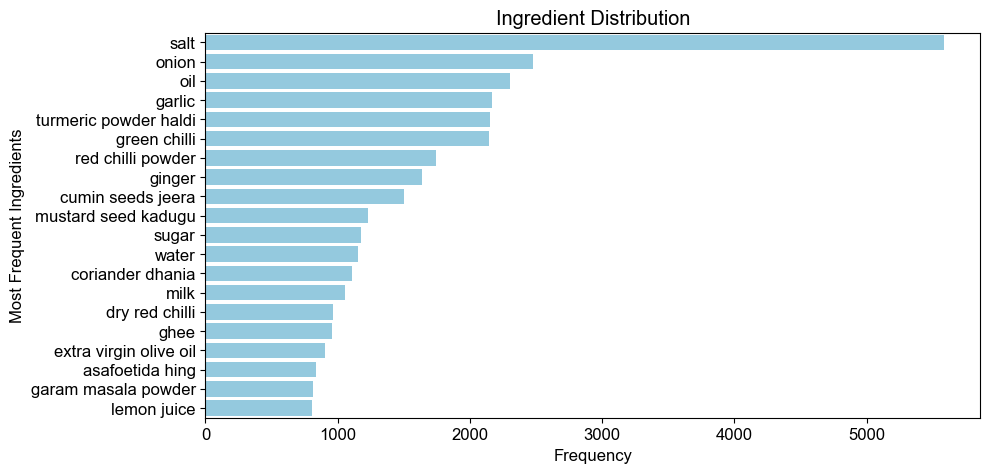

In [25]:
# Separate the ingredient names and their counts for plotting
ingredients, counts = zip(*sorted_clean_ingredients)

plt.figure(figsize=(10, 5)) 
sns.barplot(x=counts[:20], y=ingredients[:20], color='skyblue')  
plt.title('Ingredient Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Most Frequent Ingredients')  
plt.rc('font', family='Arial', size=12)
plt.show()  

Find allergen food in "cleaned_ingredients" column

In [26]:

allergen_list = ['milk', 'cheese', 'feta', 'paneer','yogurt', 'butter', 'cream', 'egg', 'tree nut', 'walnut', 'Pistachio', 'hazelnut','almond', 'pecan', 'cashew','peanut', 
                 'wheat','grain','cereal', 'triticale', 'barley', 'oats', 'rye','bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna', 'soy', 'soybean', 'soya','lupin', 'mustard', 'sesame', 
                 'fish','salmon', 'tuna', 'cod', 'crustacea','mollusc', 'clam', 'mussel', 'oyster','squid', 'shellfish', 'crab', 'lobster', 'shrimp']

# Function to find allergens in each row of ingredients
def find_allergens(ingredient_list):
    allergens_found = [ingredient for ingredient in ingredient_list if ingredient in allergen_list]
    return allergens_found if allergens_found else None  # Return None if no allergens are found

recom_df['allergens'] = recom_df['cleaned_ingredients'].apply(find_allergens)
recom_df['allergens']

0                 None
1               [fish]
2                 None
3                 None
4                 None
             ...      
6466              None
6467              None
6468              None
6469              None
6470    [butter, milk]
Name: allergens, Length: 6471, dtype: object

In [27]:
recom_df['allergens'].value_counts()

allergens
[milk]                          668
[butter]                        327
[walnut]                         77
[butter, milk]                   71
[milk, milk]                     63
                               ... 
[milk, butter, butter, milk]      1
[milk, egg]                       1
[tuna]                            1
[shrimp, shrimp]                  1
[butter, butter, cheese]          1
Name: count, Length: 94, dtype: int64

Process the texts of "name", "instructions" and "description" columns to prepare them for allergen search

In [28]:
unwanted_words = ["recipe", "no egg", "no egges", "no onion", "no garlic"]
# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

# Load stopwords
stop_words = set(stopwords.words('english'))
#stop_words.update(unwanted_words)

# Function to process the text (lemmatization and removing stopwords) and return only nouns. 
def process_text(text):
    for word in unwanted_words:
        cleaned_text = re.sub(r'\b(?:' + '|'.join(map(re.escape, unwanted_words)) + r')\b', '', text, flags=re.IGNORECASE)

    doc = nlp(cleaned_text)  # Process the text with spaCy NLP model
    lemmatized_words = []
    for token in doc:
        if token.text.lower() == "eggless":
            lemmatized_words.append(token.text.lower())
        # Skip if token is not alphabetic, is a stopword, or is an unwanted word
        if token.is_alpha and token.text.lower() not in stop_words:
            lemmatized_words.append(token.lemma_.lower())
        # Preserve "eggless" as-is

    # Remove "egg" if "eggless" is present in the list
    if "eggless" in lemmatized_words and "egg" in lemmatized_words:
        lemmatized_words = [word for word in lemmatized_words if word != "egg"]   
            
    return ' '.join(lemmatized_words)  # Return processed text as a string
   
recom_df['processed_name'] = recom_df['name'].apply(process_text)
recom_df['processed_instructions'] = recom_df['instructions'].apply(process_text)
recom_df['processed_description'] = recom_df['description'].apply(process_text)

In [29]:
#recom_df['name'][0]

In [30]:
#recom_df['processed_name'][0]

In [31]:
##recom_df['instructions'][0]

In [32]:
#recom_df['processed_instructions'][0]

Search for allergen food in combined processed columns 

In [33]:
# Function to search for allergens in combined processed columns 
def find_allergens(row, allergen_list):
    allergens_found = set()
    
    # Combine processed text columns to search within them
    combined_text = ' '.join([row['processed_name'], row['processed_instructions'], row['processed_description']])
    
    for allergen in allergen_list:
        if allergen in combined_text:
            allergens_found.add(allergen)
    
    # If allergens are found, update the allergen column as a list
    if allergens_found:
        # Check if there are existing allergens in the row 
        existing_allergens = row['allergens']
        if existing_allergens is None:
            existing_allergens = []  

        # Combine new allergens with existing ones, ensuring uniqueness
        updated_allergens = list(set(existing_allergens) | allergens_found)
        return updated_allergens  
    
    # If no new allergens are found, return the existing allergen list
    return row['allergens']

recom_df['allergens'] = recom_df.apply(lambda row: find_allergens(row, allergen_list), axis=1)
recom_df['allergens']

0                         [yogurt]
1                           [fish]
2                         [peanut]
3        [peanut, sesame, mustard]
4                         [sesame]
                   ...            
6466               [sesame, grain]
6467                     [mustard]
6468                [wheat, bread]
6469                        [oats]
6470    [wheat, milk, butter, egg]
Name: allergens, Length: 6471, dtype: object

In [34]:
recom_df['allergens'].value_counts()

allergens
[mustard]                               675
[milk]                                  150
[wheat]                                 117
[yogurt]                                108
[bread]                                 104
                                       ... 
[pasta, cream, cheese, bread]             1
[butter, cream, egg, bread]               1
[cheese, butter, bread, milk, cream]      1
[wheat, bread, milk, butter, grain]       1
[peanut, milk, butter, walnut]            1
Name: count, Length: 1535, dtype: int64

In [35]:
#count none allergen rows 
recom_df['allergens'].isna().sum()

1009

In [36]:
recom_df['allergens'].fillna("unknown", inplace=True)

Check if eggless recipes have egg in their allergen and ingredient list

In [37]:
contain_eggless = recom_df[recom_df['name'].str.contains("Eggless", case=False, na=False)]
contain_eggless

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description
2558,Eggless Thandai Mini Cheesecake Recipe,"For the crust 1-1/2 cups Marie Biscuit , or an...",Thandai Mini Cheesecake Recipe is a delicious ...,"To begin with Thandai Mini Cheesecake, firstly...",Fusion,Dessert,Vegetarian,100.0,~1 hour 45 min,"[marie biscuit, digestive cookie, butter unsal...","[cheese, butter, milk, cream, egg]",eggless eggless thandai mini cheesecake,begin thandai mini cheesecake firstly prepare ...,thandai mini cheesecake delicious creamy desse...
3450,3 minute Eggless Strawberry Red Velvet Mug Cak...,"Archana\s Kitchen Strawberry Velvet Cake Mix, ...",Satisfy your sweet cravings in just 3 minutes ...,To begin making the\xa0Eggless Strawberry Red ...,Continental,Dessert,Vegetarian,6.0,~15 min,"[velvet cake mix, oil, curd dahi yogurt, nut]","[wheat, milk, barley, egg, cashew]",minute eggless eggless strawberry red velvet m...,begin make strawberry red velvet mug cake firs...,satisfy sweet craving minute eggless eggless s...
3501,Pineapple Upside Down Cake Made with Archana's...,"Archana\s Kitchen Rich Vanilla Cake Mix, Oil, ...",The Pineapple Upside Down Cake is an absolutel...,To begin making the Pineapple Upside Down Cake...,Continental,Snack,Vegetarian,40.0,~45 min,"[rich vanilla cake mix, oil, curd dahi yogurt,...","[wheat, cream, barley, yogurt, milk, butter, g...",pineapple upside cake make archana kitchen egg...,begin make pineapple upside cake first measure...,pineapple upside cake absolutely delectable ca...
3544,Eggless Bread Omelette Recipe,"Gram flour (besan), All Purpose Flour (Maida),...",Bread Omelette is very common recipe but this ...,"To begin making Eggless Bread Omelette Recipe,...",Continental,World Breakfast,Vegetarian,15.0,~15 min,"[gram flour besan, purpose flour maida, red ch...","[butter, egg, bread]",eggless eggless bread omelette,begin make eggless eggless bread omelette take...,bread omelette common different prepare withou...
3564,Eggless Spicy Spinach Bread Recipe,"All Purpose Flour (Maida), Onion, Baking powde...",Eggless Spicy Spinach Bread is one of the quic...,To begin making the Eggless Spicy Spinach Brea...,Continental,World Breakfast,High Protein Vegetarian,60.0,~1 hour,"[purpose flour maida, onion, powder, salt, spi...","[sesame, bread, milk, butter, egg]",eggless eggless spicy spinach bread,begin make eggless eggless spicy spinach bread...,eggless eggless spicy spinach bread one quick ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,Eggless Herbed Focaccia Bread Recipe,"All Purpose Flour (Maida), Milk, Sugar, Salt, ...",This Eggless Herbed Focaccia Bread makes a gre...,"To prepare Eggless Focaccia Bread, get prep wi...",Italian,Side Dish,Vegetarian,180.0,~3.0 hours,"[purpose flour maida, milk, sugar, salt, activ...","[pasta, bread, milk, egg]",eggless eggless herbed focaccia bread,prepare eggless eggless focaccia bread get pre...,eggless eggless herbed focaccia bread make gre...
6370,Eggless Coffee Souffle Recipe With Chocolate S...,"Dark chocolate, Milk, Caster Sugar, All Purpos...",Coffee Souffle Recipe With Chocolate Sauce is ...,To prepare Eggless Coffee Souffle Recipe With ...,French,Dessert,Vegetarian,25.0,~30 min,"[dark chocolate, milk, caster sugar, purpose f...","[milk, butter, cream, egg]",eggless eggless coffee souffle chocolate sauce,prepare eggless eggless coffee souffle chocola...,coffee souffle chocolate sauce puff fluffy fra...
6388,Eggless Apple Pie Cookie Recipe,"Apples, Butter (Salted), Cinnamon Powder (Dalc...","A fridge full of apples, a cold gust of wind a...",To begin the preparation of Eggless Apple Pie ...,Continental,Dessert,Vegetarian,55.0,~1 hour,"[apple, butter, cinnamon powder dalchini, cane...","[butter, cream, egg]",eggless eggless apple pie cookie,begin preparation eggless eggless apple pie co...,fridge full apple cold gust wind love

In [38]:
contain_eggless["allergens"]

2558                   [cheese, butter, milk, cream, egg]
3450                   [wheat, milk, barley, egg, cashew]
3501    [wheat, cream, barley, yogurt, milk, butter, g...
3544                                 [butter, egg, bread]
3564                   [sesame, bread, milk, butter, egg]
                              ...                        
6324                            [pasta, bread, milk, egg]
6370                           [milk, butter, cream, egg]
6388                                 [butter, cream, egg]
6457                                        [butter, egg]
6470                           [wheat, milk, butter, egg]
Name: allergens, Length: 118, dtype: object

In [39]:
ingredients = contain_eggless[contain_eggless['cleaned_ingredients'].str.contains(r'\begg\b', case=False, na=False)]
ingredients

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description


In [40]:
#name = contain_eggless[contain_eggless['processed_name'].str.contains(r'\begg\b', case=False, na=False)]
#name

In [41]:
#instructions = contain_eggless[contain_eggless['processed_instructions'].str.contains(r'\begg\b', case=False, na=False)]
#instructions

In [42]:
#description = contain_eggless[contain_eggless['processed_description'].str.contains(r'\begg\b', case=False, na=False)]
#description

Drop "egg" from the 'allergen' column for recipes which are eggless

In [43]:
recom_df.loc[contain_eggless.index, 'allergens'] = recom_df.loc[contain_eggless.index, 'allergens'].apply(
    lambda allergens: [a for a in allergens if a.lower() != 'egg'] if isinstance(allergens, list) else allergens)

In [44]:
correct_eggless = recom_df[recom_df['name'].str.contains("Eggless", case=False, na=False)]
correct_eggless

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description
2558,Eggless Thandai Mini Cheesecake Recipe,"For the crust 1-1/2 cups Marie Biscuit , or an...",Thandai Mini Cheesecake Recipe is a delicious ...,"To begin with Thandai Mini Cheesecake, firstly...",Fusion,Dessert,Vegetarian,100.0,~1 hour 45 min,"[marie biscuit, digestive cookie, butter unsal...","[cheese, butter, milk, cream]",eggless eggless thandai mini cheesecake,begin thandai mini cheesecake firstly prepare ...,thandai mini cheesecake delicious creamy desse...
3450,3 minute Eggless Strawberry Red Velvet Mug Cak...,"Archana\s Kitchen Strawberry Velvet Cake Mix, ...",Satisfy your sweet cravings in just 3 minutes ...,To begin making the\xa0Eggless Strawberry Red ...,Continental,Dessert,Vegetarian,6.0,~15 min,"[velvet cake mix, oil, curd dahi yogurt, nut]","[wheat, milk, barley, cashew]",minute eggless eggless strawberry red velvet m...,begin make strawberry red velvet mug cake firs...,satisfy sweet craving minute eggless eggless s...
3501,Pineapple Upside Down Cake Made with Archana's...,"Archana\s Kitchen Rich Vanilla Cake Mix, Oil, ...",The Pineapple Upside Down Cake is an absolutel...,To begin making the Pineapple Upside Down Cake...,Continental,Snack,Vegetarian,40.0,~45 min,"[rich vanilla cake mix, oil, curd dahi yogurt,...","[wheat, cream, barley, yogurt, milk, butter, g...",pineapple upside cake make archana kitchen egg...,begin make pineapple upside cake first measure...,pineapple upside cake absolutely delectable ca...
3544,Eggless Bread Omelette Recipe,"Gram flour (besan), All Purpose Flour (Maida),...",Bread Omelette is very common recipe but this ...,"To begin making Eggless Bread Omelette Recipe,...",Continental,World Breakfast,Vegetarian,15.0,~15 min,"[gram flour besan, purpose flour maida, red ch...","[butter, bread]",eggless eggless bread omelette,begin make eggless eggless bread omelette take...,bread omelette common different prepare withou...
3564,Eggless Spicy Spinach Bread Recipe,"All Purpose Flour (Maida), Onion, Baking powde...",Eggless Spicy Spinach Bread is one of the quic...,To begin making the Eggless Spicy Spinach Brea...,Continental,World Breakfast,High Protein Vegetarian,60.0,~1 hour,"[purpose flour maida, onion, powder, salt, spi...","[sesame, bread, milk, butter]",eggless eggless spicy spinach bread,begin make eggless eggless spicy spinach bread...,eggless eggless spicy spinach bread one quick ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,Eggless Herbed Focaccia Bread Recipe,"All Purpose Flour (Maida), Milk, Sugar, Salt, ...",This Eggless Herbed Focaccia Bread makes a gre...,"To prepare Eggless Focaccia Bread, get prep wi...",Italian,Side Dish,Vegetarian,180.0,~3.0 hours,"[purpose flour maida, milk, sugar, salt, activ...","[pasta, bread, milk]",eggless eggless herbed focaccia bread,prepare eggless eggless focaccia bread get pre...,eggless eggless herbed focaccia bread make gre...
6370,Eggless Coffee Souffle Recipe With Chocolate S...,"Dark chocolate, Milk, Caster Sugar, All Purpos...",Coffee Souffle Recipe With Chocolate Sauce is ...,To prepare Eggless Coffee Souffle Recipe With ...,French,Dessert,Vegetarian,25.0,~30 min,"[dark chocolate, milk, caster sugar, purpose f...","[milk, butter, cream]",eggless eggless coffee souffle chocolate sauce,prepare eggless eggless coffee souffle chocola...,coffee souffle chocolate sauce puff fluffy fra...
6388,Eggless Apple Pie Cookie Recipe,"Apples, Butter (Salted), Cinnamon Powder (Dalc...","A fridge full of apples, a cold gust of wind a...",To begin the preparation of Eggless Apple Pie ...,Continental,Dessert,Vegetarian,55.0,~1 hour,"[apple, butter, cinnamon powder dalchini, cane...","[butter, cream]",eggless eggless apple pie cookie,begin preparation eggless eggless apple pie co...,fridge full apple cold gust wind love baking r...
6457,Apple Roses Recip

In [45]:
correct_eggless["allergens"]

2558                        [cheese, butter, milk, cream]
3450                        [wheat, milk, barley, cashew]
3501    [wheat, cream, barley, yogurt, milk, butter, g...
3544                                      [butter, bread]
3564                        [sesame, bread, milk, butter]
                              ...                        
6324                                 [pasta, bread, milk]
6370                                [milk, butter, cream]
6388                                      [butter, cream]
6457                                             [butter]
6470                                [wheat, milk, butter]
Name: allergens, Length: 118, dtype: object

Create "allergen_type" column using the data in "allergens" column

In [46]:
allergen_categories = {
    "Dairy": ["milk", "paneer", "feta","cheese", "yogurt", "butter", "cream"],
    "Eggs": ["egg"],
    "Fish and Shellfish": ["fish", "shellfish", 'crustacea','mollusc', "salmon", "tuna", "cod", "shrimp", "crab", "lobster", "mussel", "oyster", "squid"],
    "Tree Nuts and Peanuts": ['tree nut', "almond", "cashew", "walnut", "peanut", "pistachio", 'pecan', 'hazelnut'],
    "Legumes and Seeds": ["peanut", "soybean",' soy', 'soya', "sesame", "mustard"],
    "Grains and Gluten": ["grain", 'triticale', "wheat", "barley", "rye", "oats", "cereal", 'bread', 'naan', 'pasta', 'spaghetti', 'macaroni', 'lasagna']
}
def categorize_allergens(allergens):
    allergen_types = []
    for allergen in allergens:
        for category, items in allergen_categories.items():
            if allergen in items and category not in allergen_types:
                allergen_types.append(category)
    return allergen_types if allergen_types else None

recom_df["allergen_type"] = recom_df["allergens"].apply(categorize_allergens)
recom_df["allergen_type"]

0                                          [Dairy]
1                             [Fish and Shellfish]
2       [Tree Nuts and Peanuts, Legumes and Seeds]
3       [Tree Nuts and Peanuts, Legumes and Seeds]
4                              [Legumes and Seeds]
                           ...                    
6466        [Legumes and Seeds, Grains and Gluten]
6467                           [Legumes and Seeds]
6468                           [Grains and Gluten]
6469                           [Grains and Gluten]
6470                    [Grains and Gluten, Dairy]
Name: allergen_type, Length: 6471, dtype: object

In [47]:
recom_df['allergen_type'].fillna("Unknown", inplace=True)

In [48]:
recom_df["allergen_type"].value_counts()

allergen_type
Unknown                                                                 1045
[Dairy]                                                                  947
[Legumes and Seeds]                                                      813
[Grains and Gluten]                                                      427
[Grains and Gluten, Dairy]                                               424
                                                                        ... 
[Tree Nuts and Peanuts, Eggs, Grains and Gluten, Dairy]                    1
[Legumes and Seeds, Tree Nuts and Peanuts, Grains and Gluten, Dairy]       1
[Tree Nuts and Peanuts, Grains and Gluten, Legumes and Seeds, Eggs]        1
[Fish and Shellfish, Legumes and Seeds, Eggs]                              1
[Tree Nuts and Peanuts, Dairy, Legumes and Seeds]                          1
Name: count, Length: 169, dtype: int64

Check if index values of "Gluten free" data in "diet" column are matched with the index values of "Grains and Gluten" data in "allergen_type" column

In [49]:
gluten_free_df = recom_df[recom_df['diet']=="Gluten Free"]
gluten_free_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
19,Cabbage & Buttermilk Curry Recipe,"1 Cabbage (Patta Gobi/ Muttaikose) , medium si...",Cabbage & Buttermilk Curry Recipe is one of my...,"To prepare Cabbage & Buttermilk Curry Recipe, ...",Indian,Lunch,Gluten Free,35.0,~45 min,"[cabbage muttaikose, green chilli, slit, musta...","[butter, mustard, milk]",cabbage buttermilk curry,prepare cabbage buttermilk curry prep ingredie...,cabbage buttermilk curry one mother creation a...,"[Dairy, Legumes and Seeds]"
177,Besan Arbi Roast Recipe - Spicy Colocasia Stir...,250 grams Colocasia root (Arbi) 2 tablespoon ...,Arbi is Colocasia or Taro Root. It’s a root ve...,"To begin making the Besan Arbi Roast Recipe, s...",Indian,World Breakfast,Gluten Free,50.0,~1 hour,"[colocasia root arbi, gram flour besan, red ch...",unknown,besan arbi roast spicy colocasia stir fry,begin make besan arbi roast scrub arbi get rid...,arbi colocasia taro root root vegetable gluten...,Unknown
203,Mixed Vegetable Akki Roti Recipe,"300 grams Rice flour 1 Carrot (Gajjar) , grat...",Mixed Vegetable Akki Roti is a famous recipe f...,"To prepare Mixed Vegetable Akki Roti Recipe, g...",North Karnataka,South Indian Breakfast,Gluten Free,85.0,~1 hour 30 min,"[rice flour, carrot gajjar, cucumber, green be...","[butter, bread]",mixed vegetable akki roti,prepare mixed vegetable akki roti grate chop v...,mixed vegetable akki roti famous karnataka art...,"[Dairy, Grains and Gluten]"
281,Masala Akki Roti With Spinach Recipe - sarvapi...,3 cups Rice flour 2 cups Water 1 cup Spring ...,Sarvapindi also known as Akki roti in some are...,To begin preparing the Masala Akki Roti with S...,Andhra,South Indian Breakfast,Gluten Free,100.0,~1 hour 45 min,"[rice flour, water, spring onion green, spinac...","[sesame, yogurt]",masala akki roti spinach sarvapindi,begin prepare masala akki roti spinach deep po...,sarvapindi also know akki roti area telangana ...,"[Legumes and Seeds, Dairy]"
348,Mini Bajra Uttapam Recipe,For the Bajra uttapam 1/2 cup Bajra (seeds) 1...,Mini Bajra Uttapam Recipe is essentially a mil...,"To begin making the Mini Bajra Uttapam Recipe,...",South Indian,South Indian Breakfast,Gluten Free,520.0,~8.0 hours 30 min,"[bajra seed, idli rice, white urad dal whole, ...",unknown,mini bajra uttapam,begin make mini bajra uttapam first make batte...,mini bajra uttapam essentially millet base utt...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6357,Instant Puliyodharai Powder Recipe (Puliyogare...,"Tamarind, Jaggery, Asafoetida (hing), Salt, Ch...",Puliyodharai/Puliyogare/Pulihora is a traditio...,"""To begin making Instant Puliyodharai/ Puliyog...",South Indian,Appetizer,Gluten Free,55.0,~1 hour,"[tamarind, jaggery, asafoetida hing, salt, cha...","[peanut, sesame, mustard]",instant puliyodharai powder puliyogare pulihor...,begin make instant puliyogare pulihora powder ...,puliyodharai puliyogare pulihora traditional r...,"[Tree Nuts and Peanuts, Legumes and Seeds]"
6358,Homemade Herb Butter Recipe,"Butter (Salted), Parsley leaves, Basil leaves,...",Having a Homemade Herb Butter ready in your re...,To begin making the\xa0Homemade Herb Butter Re...,Continental,Side Dish,Gluten Free,30.0,~30 min,"[butter, parsley, basil leave, lemon zest]","[butter, bread, pasta]",homemade herb butter,begin make herb butter combine ingredient mini...,homemade herb butter ready refrigerator get re...,"[Dairy, Grains and Gluten]"
6359,Kolhapuri Masala Recipe (Maharashtrian Masala ...,"Coriander (Dhania) Seeds, Cumin seeds (Jeera),...",Kolhapuri Masala Recipe is a spicy Maharashtri...,To begin making the\xa0Kolhapuri Masala Recipe...,Maharashtrian,Side Dish,Gluten Free,30.0,~30 min,"[coriander dhania seed, cumin seeds jeera, coc...",unknown,kolhapuri masala maharashtrian masala chutney ...,begin make masala traditional mahar

In [50]:
gluten_df = recom_df[recom_df["allergen_type"].apply(lambda x: "Grains and Gluten" in x)]
gluten_df

,name,ingredients,description,instructions,cuisine,course,diet,prep_time,categorized_prep_time,cleaned_ingredients,allergens,processed_name,processed_instructions,processed_description,allergen_type
12,Mixed Vegetable Pulao Recipe,1 cup Brown Rice 2 tablespoons Ghee 2 cloves...,The Mixed Vegetable Pulao Recipe is a simple a...,To begin making the Mixed Vegetable Pulao Reci...,Indian,Dinner,Vegetarian,60.0,~1 hour,"[brown rice, ghee, garlic, green chilli, slit,...",[grain],mixed vegetable pulao,begin make mixed vegetable pulao first wash so...,mixed vegetable pulao simple quick cook dish b...,[Grains and Gluten]
14,Hyderabadi Shahi Mixed Vegetable Curry Recipe,"12 Baby Potatoes , boiled peeled and cubed 1/...",The Hyderabadi Shahi Mixed Vegetable Curry Rec...,To begin making the Hyderabadi Shahi Mixed Veg...,Hyderabadi,Lunch,Vegetarian,70.0,~1 hour 15 min,"[baby potato, green peas matar, carrot gajjar,...","[wheat, cream, almond, cashew]",hyderabadi shahi mixed vegetable curry,begin make hyderabadi shahi mixed vegetable cu...,hyderabadi shahi mixed vegetable curry rich gr...,"[Grains and Gluten, Dairy, Tree Nuts and Peanuts]"
22,Karwar Style Valval Recipe (Mixed Vegetables I...,"1 cup Green beans (French Beans) , Chopped 1 ...",Karwar Style Valval Recipe (Mixed Vegetables I...,To begin making the Karwar Style Valval Recipe...,Coastal Karnataka,Lunch,Vegetarian,35.0,~45 min,"[green bean french bean, carrot gajjar, green ...","[wheat, mustard, milk, cream]",karwar style valval mixed vegetables coconut milk,begin make karwar style valval mixed vegetable...,karwar style valval mixed vegetables coconut m...,"[Grains and Gluten, Legumes and Seeds, Dairy]"
28,Whole Wheat Lachha Paratha Recipe-Multilayered...,2 cups Whole Wheat Flour 1 teaspoon Salt Ghee...,The Whole Wheat Lachha Paratha Recipe is a cla...,To begin making the Whole Wheat Lachha Paratha...,Indian,Dinner,Diabetic Friendly,70.0,~1 hour 15 min,"[whole wheat flour, salt ghee]","[paneer, yogurt, bread, wheat]",whole wheat lachha paratha layered indian flat...,begin make whole wheat lachha paratha first kn...,whole wheat lachha paratha classic indian laye...,"[Dairy, Grains and Gluten]"
30,Baked Amritsari Kulcha Recipe (Without Yeast),1-1/2 cup All Purpose Flour (Maida) 1 teaspoo...,Kulcha is a type of mildly leavened flatbread ...,To begin making the Baked Amritsari Kulcha rec...,Punjabi,Dinner,Vegetarian,20.0,~30 min,"[purpose flour maida, salt, sugar, powder, sod...","[sesame, bread, naan, butter]",baked amritsari kulcha without yeast,begin make baked amritsari kulcha medium sized...,kulcha type mildly leaven flatbread originate ...,"[Legumes and Seeds, Grains and Gluten, Dairy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6465,Arbi Cutlet Recipe (Spiced Colocasia Patties),"Colocasia root (Arbi), Onion, Green Chilli, Re...",Arbi Cutlet is a crispy golden brown patties m...,We begin making the Arbi Cutlet (Spiced Coloca...,North Indian,Snack,Vegetarian,40.0,~45 min,"[colocasia root arbi, onion, green chilli, red...",[bread],arbi cutlet spiced colocasia patties,begin make arbi cutlet spiced colocasia pattie...,arbi cutlet crispy golden brown patty make col...,[Grains and Gluten]
6466,Alu Vadi Or Patrode Recipe - Maharashtrian Sna...,"Colocasia Leaves (Arbi), Multigrain flour, Tam...",Alu vadi or Patrode is a typical Maharashtrian...,To begin making Alu Vadi or Patrode Recipe - M...,Maharashtrian,Snack,Vegetarian,40.0,~45 min,"[colocasia leave arbi, multigrain flour, tamar...","[sesame, grain]",alu vadi patrode maharashtrian snack colocasia...,begin make alu vadi patrode maharashtrian snac...,alu vadi patrode typical maharashtrian snack s...,"[Legumes and Seeds, Grains and Gluten]"
6468,Palak Puri Recipe (Crispy Spinach Puri Snack),"Whole Wheat Flour, Spinach Leaves (Palak), Gin...","Puri is deep fried Indian bread, commonly avai...","Wash the finely chopped spinach, and let it dr...",North Indian,Snack,Vegetarian,30.0,~30 min,"[whole wheat flour, spinach 

In [51]:
# Check if index values of glute_df are in gluten_free_df
similarity_gluten_wih_gluten_free = gluten_df.index.isin(gluten_free_df.index)

# This give us a boolean array indicating whether each index in glute_df is also in gluten_free_df
print(similarity_gluten_wih_gluten_free)

# Give index numbers that are present in both dataframes:
common_indices = gluten_df.index[similarity_gluten_wih_gluten_free]
print("Common indices:", common_indices.tolist())

[False False False ... False False False]
Common indices: [203, 578, 683, 782, 892, 1438, 1609, 2190, 3124, 3804, 4076, 4240, 4436, 4437, 5923, 5942, 6358, 6364, 6459]


In [52]:
#recom_df.iloc[5121]

In [53]:
#recom_df["description"][5121]

In [54]:
#recom_df["instructions"][5121]

Find the most frequent allergen type and plot their distribution 

In [55]:
#Flatten the list of ingredients from all rows
all_allergen_type = [allergen for sublist in recom_df['allergen_type'] if isinstance(sublist, list) for allergen in sublist]

#Count the frequency of each allergen type
allergen_type_counts = Counter (all_allergen_type)

most_frequent_allergen_type = allergen_type_counts.most_common(10) 

print(f"Most frequent allergen type: {most_frequent_allergen_type[0][0]}, Count: {most_frequent_allergen_type[0][1]}")

sorted_allergen_type = allergen_type_counts.most_common()  
#print(sorted_allergen_type)

Most frequent allergen type: Dairy, Count: 3286


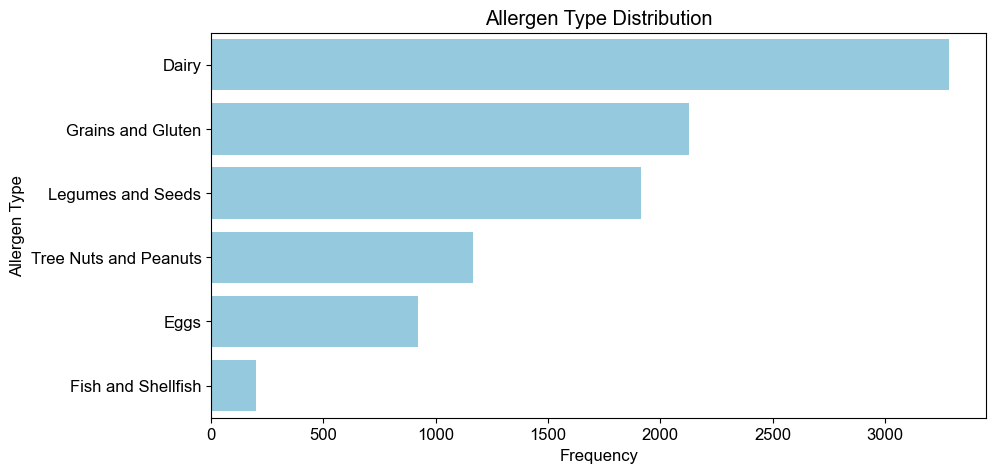

In [56]:
# Separate the allergen types and their counts for plotting
allergen_type, counts = zip(*sorted_allergen_type)

plt.figure(figsize=(10, 5)) 
sns.barplot(x=counts, y=allergen_type, color='skyblue')  
plt.title('Allergen Type Distribution')  
plt.xlabel('Frequency') 
plt.ylabel('Allergen Type')  
plt.rc('font', family='Arial', size=12)
plt.show()  

Prepare different combination of data for topic modeling

In [57]:
# Convert each list in the 'cleaned_ingredient' column to a space-separated string to standardize the form of all precocessed colmuns. 
recom_df["processed_ingredients"] = recom_df['cleaned_ingredients'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

#Combine processed columns of "processed_name"and "processed_ingredients" into a single column for topic modeling
recom_df['combined_name_ingredients'] = recom_df['processed_name'] + ' ' + recom_df['processed_ingredients']

# Combine all processed columns into a single column for topic modeling
recom_df['combined_texts'] = recom_df['processed_name'] + ' ' + recom_df['processed_ingredients'] + ' ' + recom_df['processed_description'] + ' ' + recom_df['processed_instructions']

In [58]:
recom_df.fillna('', inplace=True)
recom_df['prep_time_str'] = recom_df['prep_time'].astype(str)
# Convert `allergen_type` (list) to a string
recom_df['allergen_type_str'] = recom_df['allergen_type'].apply(lambda x: ', '.join(x) if isinstance(x, list) else '')

# Combine all relevant columns into a single string
recom_df['combined_all'] = (recom_df['processed_name'] + ' ' + recom_df['processed_ingredients'] + ' ' + recom_df['processed_description'] + ' ' +
        recom_df['processed_instructions'] + ' ' + recom_df['diet'] + ' ' + recom_df['course'] + ' ' + recom_df['cuisine'] + ' ' +
        recom_df['prep_time_str'] + ' ' + recom_df['allergen_type_str']
    )

recom_df['combined_all'] = recom_df['combined_all'].str.strip()
recom_df['combined_all'] 

C:\Users\rogha\AppData\Local\Temp\ipykernel_70124\2621597263.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  recom_df.fillna('', inplace=True)


0       doddapatre tambuli karpooravalli thayir pachad...
1       fish tandoori fish curd dahi yogurt onion gree...
2       arbi shimla mirch sabzi colocasia capsicum sab...
3       ambur style brinjal curry brinjal baingan eggp...
4       mavinakayi menasinakai curry raw mango coconut...
                              ...                        
6466    alu vadi patrode maharashtrian snack colocasia...
6467    kheel paniyaram puffed rice paniyaram rice soo...
6468    palak puri crispy spinach puri snack whole whe...
6469    spinach oats vada spinach leave palak chana da...
6470    kerala style vettu cake eggless eggless wholew...
Name: combined_all, Length: 6471, dtype: object

In [59]:
#recom_df.to_pickle('data/processed_recipes.pkl')